In [5]:
%matplotlib inline
import sys;
import math;
import os;
import numpy as np;
from numba import jit;
import matplotlib.pyplot as plt

In [27]:

def CalculateValues():
    
    Gyr = False;
    
    Folder = os.listdir("Data/");

    sizes    = np.zeros([250]);
    gyration = np.zeros([250]);

    c = 0;

    for h in range(0,len(Folder)):
        print(h);
        Data = np.load("Data/"+str(Folder[h]));
        Settings = Data['Settings'];
        Polymers = Data['Polymers']
        for i in range(0, len(Polymers)):
            c = c + 1;
            for j in range(0, 250):
                # Calculate the end to end distance
                x = Polymers[i]['BeadPosition'][j,0];
                y = Polymers[i]['BeadPosition'][j,1];
                sizes[j] += x**2+y**2
                
                if (Gyr and j >= 1):
                    # Calculaate the gyration distance
                    xmean = np.mean(Polymers[i]['BeadPosition'][0:j,0]);
                    ymean = np.mean(Polymers[i]['BeadPosition'][0:j,1]);
                    g = 0;
                    for k in range(0,j+1):
                        g += (Polymers[i]['BeadPosition'][k,0]-xmean)**2;
                        g += (Polymers[i]['BeadPosition'][k,1]-ymean)**2;
                    g = g / (j+1);
                    gyration[j] += g;

        
    for j in range(0, len(sizes)):
        gyration[j] = gyration[j] / c
        sizes[j] = sizes[j] / c
                                  
    return {'Gyration':gyration, 'Sizes':sizes}
Result = CalculateValues();
print("Done")

0
Done


In [22]:
Folder = os.listdir("Data/");
Data = np.load("Data/"+str(Folder[0]));

{'epsilon': 0.25, 'sigma': 0.8, 'T': 1, 'theta': 6}


NameError: name 'Result' is not defined

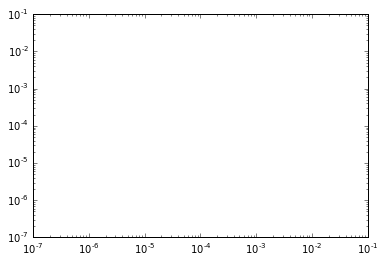

In [24]:
t = np.zeros([250]);
for i in range(0,250):
    t[i] = i**1.5;
x = np.linspace(1,250,250);
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
ax.set_xscale('log')
plot1 = ax.plot(Result['Gyration'], label='Simulation');
plot2 = ax.plot(t, label='N^1.5')
ax.legend(loc=2)
plt.title("Polymer size vs End to end distance")
plt.xlabel("Polymer size [N]")
plt.ylabel("End to end distance")
plt.show()

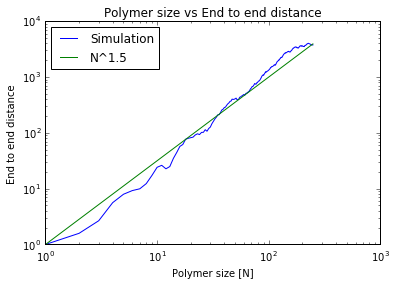

In [28]:
t = np.zeros([250]);
for i in range(0,250):
    t[i] = i**1.5;
x = np.linspace(1,250,250);
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_yscale('log')
ax.set_xscale('log')
plot1 = ax.plot(Result['Sizes'], label='Simulation');
plot2 = ax.plot(t, label='N^1.5')
ax.legend(loc=2)
plt.title("Polymer size vs End to end distance")
plt.xlabel("Polymer size [N]")
plt.ylabel("End to end distance")
plt.show()